# Implementatation of gradient descent

In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the training data into feature matrix, class labels, and event ids:

In [18]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


### Now let us turn to the proper machine learning side of the problem

WRITE SOME ANALYSIS HERE


 Testing for max iterations of :  25
gamma= 0.5, Percentage of classification error :  1.0482662793
gamma= 0.482088, Percentage of classification error :  1.02828877643
gamma= 0.464818, Percentage of classification error :  1.01375785028
gamma= 0.448166, Percentage of classification error :  1.00162377704
gamma= 0.432111, Percentage of classification error :  0.992681167547
gamma= 0.416631, Percentage of classification error :  0.98650408347
gamma= 0.401706, Percentage of classification error :  0.983608151798
gamma= 0.387315, Percentage of classification error :  0.982960228389
gamma= 0.37344, Percentage of classification error :  1.18891281357
gamma= 0.360062, Percentage of classification error :  1.16941521664
gamma= 0.347163, Percentage of classification error :  1.15364097811
gamma= 0.334726, Percentage of classification error :  1.13893091881
gamma= 0.322735, Percentage of classification error :  1.12631002683
gamma= 0.311173, Percentage of classification error :  1.12036723804


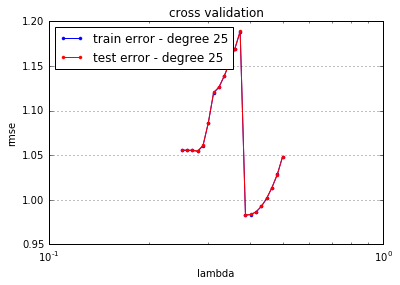

In [39]:
from gradient_descent import cross_validation, least_squares_GD
def run_gradient_descent(y, tX):
    """ridge regression running script. works on the RAW data"""
    
    # define parameters for our run   
    gammas = 1 / np.logspace(1,2,20,base=2)
    max_iters = np.array([25])
    k_fold = 6
    seed = 69
    
    rmse,gamma,error = cross_validation(y,tX,gammas,max_iters,k_fold,seed)
    #Let us now clean the input
    tX,median_tr = sanitize_NaN(tX)
    tX,mean_tr,std_tr = standardize(tX)
    
    weights = least_squares_GD(y, tX, gamma, max_iters[0])

    print('Weights on whole set\n',weights)
    
    DATA_TEST_PATH = '../data/test.csv'  # Download train data and supply path here 
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    
    tX_test_sorted,median_vec = sanitize_NaN(tX_test,median_tr)
    tX_test_sorted,mean_tr,std_tr = standardize(tX_test_sorted,mean_tr,std_tr)
    OUTPUT_PATH = '../data/output_sanitized_normalization_degree3_lambda_finer.csv' # Fill in desired name of output file for submission
    y_pred = predict_labels(np.array(weights), np.array(tX))
    create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

run_gradient_descent(y,tX)

In [32]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from gradient_descent import *
%load_ext autoreload
%autoreload 2

def run():
    """gradient descent running script. works on the RAW data"""
    
    #0. DEFINE PARAMETERS FOR OUR RUN
    seed = 69
    
    #not possible yet to run polynomial  degrees at the same time.
    degrees = np.array([3])
    k_fold = 4
    lambdas = np.logspace(-1,2,50)
    
    #1. LOAD THE DATA
    print('LOADING THE DATA: ',end=" ")
    DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
    y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
    print('DONE')
    
    #2. RUN CROSS VALIDATION TO GET BEST LAMBDA
    print('CROSS VALIDATION')
    rmse,lambda_ = cross_validation(y,tX,degrees,lambdas,k_fold,seed)
    #Let us now clean the input
    tX,median_tr = sanitize_NaN(tX)
    tX,mean_tr,std_tr = standardize(tX)
    tX = build_poly(tX,degrees[0])
    
    #3. TRAIN THE MODEL
    weights = ridge_regression(y, tX, lambda_[0])

    print('Weights on whole set\n',weights)
    
    #4. TEST THE MODEL AND EXPORT THE RESULTS
    DATA_TEST_PATH = 'data/test.csv'  # Download train data and supply path here 
    print('IMPORTING TESTING DATA :',end=" ")
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    print('DONE')
    
    tX_test_sorted,median_vec = sanitize_NaN(tX_test,median_tr)
    tX_test_sorted,mean_tr,std_tr = standardize(tX_test_sorted,mean_tr,std_tr)
    tX_test_sorted = build_poly(tX_test_sorted, degrees[0])
    OUTPUT_PATH = 'data/output_sanitized_normalization_degree1_lambda_finer_test.csv' # Fill in desired name of output file for submission
    print('EXPORTING TESTING DATA WITH PREDICTIONS :',end=" ")
    y_pred = predict_labels(np.array(weights), np.array(tX_test_sorted))
    create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
    print('DONE')

run()

ImportError: No module named 'ridge_regression'